In [1]:
import torch
import numpy as np

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.zeros(3, 3, 3, 3)

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]])

In [4]:
torch.rand(1, 3)

tensor([[0.2309, 0.8334, 0.7602]])

In [5]:
t = torch.rand(3, 5, 3)
t, torch.transpose(t, 2, 1)

(tensor([[[0.5822, 0.4584, 0.6029],
          [0.3761, 0.3066, 0.2353],
          [0.1565, 0.7869, 0.6173],
          [0.5565, 0.3781, 0.0647],
          [0.3028, 0.4214, 0.1616]],
 
         [[0.0376, 0.9579, 0.1804],
          [0.8438, 0.4496, 0.1214],
          [0.4008, 0.6298, 0.5156],
          [0.5820, 0.6996, 0.0193],
          [0.4245, 0.7831, 0.7664]],
 
         [[0.6702, 0.6495, 0.3548],
          [0.7711, 0.3951, 0.7145],
          [0.0783, 0.4170, 0.3240],
          [0.2517, 0.5751, 0.2722],
          [0.1860, 0.9601, 0.9079]]]),
 tensor([[[0.5822, 0.3761, 0.1565, 0.5565, 0.3028],
          [0.4584, 0.3066, 0.7869, 0.3781, 0.4214],
          [0.6029, 0.2353, 0.6173, 0.0647, 0.1616]],
 
         [[0.0376, 0.8438, 0.4008, 0.5820, 0.4245],
          [0.9579, 0.4496, 0.6298, 0.6996, 0.7831],
          [0.1804, 0.1214, 0.5156, 0.0193, 0.7664]],
 
         [[0.6702, 0.7711, 0.0783, 0.2517, 0.1860],
          [0.6495, 0.3951, 0.4170, 0.5751, 0.9601],
          [0.3548, 0.7145, 0.

In [6]:
t, torch.transpose(t, 1, 2)

(tensor([[[0.5822, 0.4584, 0.6029],
          [0.3761, 0.3066, 0.2353],
          [0.1565, 0.7869, 0.6173],
          [0.5565, 0.3781, 0.0647],
          [0.3028, 0.4214, 0.1616]],
 
         [[0.0376, 0.9579, 0.1804],
          [0.8438, 0.4496, 0.1214],
          [0.4008, 0.6298, 0.5156],
          [0.5820, 0.6996, 0.0193],
          [0.4245, 0.7831, 0.7664]],
 
         [[0.6702, 0.6495, 0.3548],
          [0.7711, 0.3951, 0.7145],
          [0.0783, 0.4170, 0.3240],
          [0.2517, 0.5751, 0.2722],
          [0.1860, 0.9601, 0.9079]]]),
 tensor([[[0.5822, 0.3761, 0.1565, 0.5565, 0.3028],
          [0.4584, 0.3066, 0.7869, 0.3781, 0.4214],
          [0.6029, 0.2353, 0.6173, 0.0647, 0.1616]],
 
         [[0.0376, 0.8438, 0.4008, 0.5820, 0.4245],
          [0.9579, 0.4496, 0.6298, 0.6996, 0.7831],
          [0.1804, 0.1214, 0.5156, 0.0193, 0.7664]],
 
         [[0.6702, 0.7711, 0.0783, 0.2517, 0.1860],
          [0.6495, 0.3951, 0.4170, 0.5751, 0.9601],
          [0.3548, 0.7145, 0.

In [7]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')

In [8]:
from torch.utils.data import TensorDataset, DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [9]:
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ weight + bias

In [10]:
def loss_fn(input, target):
    return (input - target).pow(2).mean()

In [11]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 25.6209
Epoch 10 Loss 27.8889
Epoch 20 Loss 24.6336
Epoch 30 Loss 0.6020
Epoch 40 Loss 0.0124
Epoch 50 Loss 2.4036
Epoch 60 Loss 0.4266
Epoch 70 Loss 0.3401
Epoch 80 Loss 1.6595
Epoch 90 Loss 0.2298
Epoch 100 Loss 0.8779
Epoch 110 Loss 0.3372
Epoch 120 Loss 0.5855
Epoch 130 Loss 0.3383
Epoch 140 Loss 1.3848
Epoch 150 Loss 0.1109
Epoch 160 Loss 0.1034
Epoch 170 Loss 0.0046
Epoch 180 Loss 0.0038
Epoch 190 Loss 0.0006


In [12]:
print(f'Final Params: {weight.item():.4f}x + {bias.item():.4f}')

Final Params: 2.6655x + 4.8826


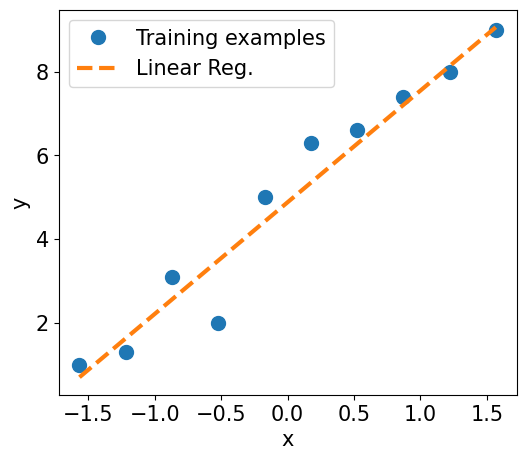

In [13]:
import matplotlib.pyplot as plt

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

In [14]:
import torch.nn as nn

loss_fn = nn.MSELoss(reduction='mean')

input_size = 1
output_size = 1

model = nn.Linear(input_size, output_size)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 101.8903
Epoch 10 Loss 3.4578
Epoch 20 Loss 25.1500
Epoch 30 Loss 0.6551
Epoch 40 Loss 0.3538
Epoch 50 Loss 9.8458
Epoch 60 Loss 0.0757
Epoch 70 Loss 0.2836
Epoch 80 Loss 1.2676
Epoch 90 Loss 3.5426
Epoch 100 Loss 0.0068
Epoch 110 Loss 0.5661
Epoch 120 Loss 0.3213
Epoch 130 Loss 1.7392
Epoch 140 Loss 1.5266
Epoch 150 Loss 0.2322
Epoch 160 Loss 1.2358
Epoch 170 Loss 0.3513
Epoch 180 Loss 0.0045
Epoch 190 Loss 2.1535


In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)


In [17]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [18]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return X

In [19]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [20]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
# num_epochs = 100
# loss_hist = [0] * num_epochs
# accuracy_hist = [0] * num_epochs
# for epoch in range(num_epochs):
#     for x_batch, y_batch in train_dl:
#         pred = model(x_batch)
#         loss = loss_fn(pred, y_batch.long())
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()
#         loss_hist[epoch] += loss.item()*y_batch.size(0)
#         is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
#         accuracy_hist[epoch] += is_correct.mean()
#     loss_hist[epoch] /= len(train_dl.dataset)
#     accuracy_hist[epoch] /= len(train_dl.dataset)

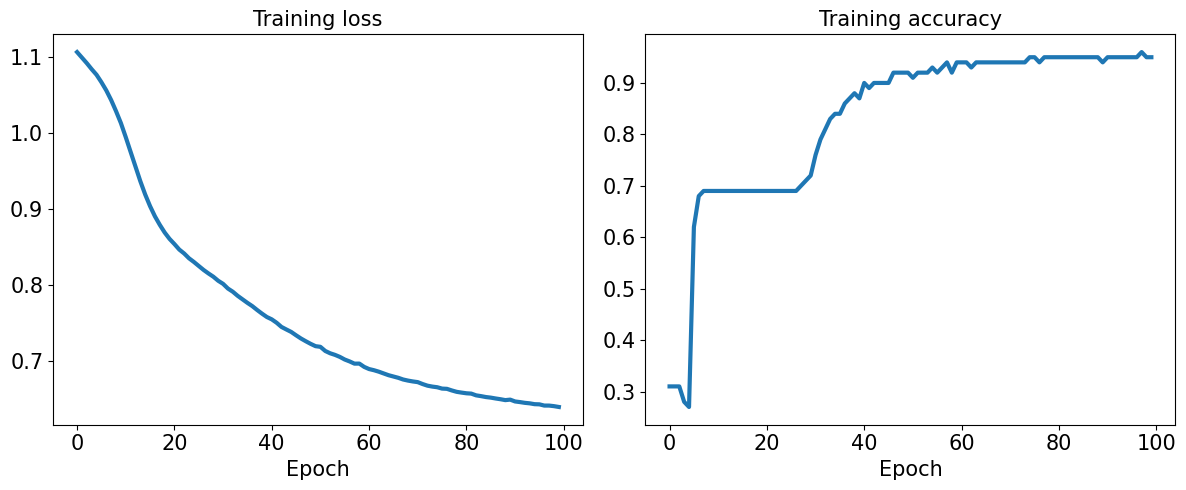

In [22]:

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)





X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train) 

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)




class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)  
        self.layer2 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x
    
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)




num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)




fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()


In [23]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')


Test Acc.: 0.9800


In [24]:
import sys
import os
import pycuber as pc
from pycuber.solver import CFOPSolver

c = pc.Cube()
alg = pc.Formula()
random_alg = alg.random()
print(random_alg)
c(random_alg)
print(c)

solver = CFOPSolver(c)

solution = solver.solve(suppress_progress_messages=True)

print(solution)

D' B2 L U2 B' L U2 B L2 U' B2 D' L2 F2 R2 B L2 F U R' F L2 B2 D2 R'
         [r][w][g]
         [w][y][y]
         [r][y][g]
[b][o][b][w][r][o][y][o][w][o][r][y]
[w][r][o][g][g][o][b][o][g][r][b][g]
[y][w][r][y][g][b][w][b][r][g][r][o]
         [g][y][o]
         [b][w][y]
         [b][b][w]

D' B U' D R F2 B D B U B' U F' U2 F U' F' U' F U2 R' U R U2 B U B' L U L' U F U F' U F U' F' R U B U' B' U B U' B' R' U B2 D L' U L' U' L D' B2 R' U R


In [29]:
print(c)

         [y][y][y]
         [y][y][y]
         [y][y][y]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
         [w][w][w]
         [w][w][w]
         [w][w][w]



In [40]:
print([str(x) for x in np.array(c.get_face('F')).flatten()])

['[g]', '[g]', '[g]', '[g]', '[g]', '[g]', '[g]', '[g]', '[g]']


In [43]:
pc.Square('green')

In [45]:
pc.Cubie(U=pc.Square('yellow'))

Cubie(U: [y])